In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
file_path = "/data/workspace_files/lungcapacity.csv"
male_rlv = 1.2+1.1+3.3
female_rlv = 1.1+0.8+1.9

In [3]:
df = pd.read_csv(file_path)
df = df.dropna()
df.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean,No of children,Weight (kg)
1,10.125,18.0,74.7,yes,female,no,0,98.75
2,9.550,16.0,69.7,no,female,yes,0,11.01
3,11.125,14.0,71.0,no,male,no,1,29.78
4,4.800,5.0,56.9,no,male,no,4,72.84
5,6.225,11.0,58.7,no,female,no,1,24.76


In [4]:
male_lung_cap_avg = df[df['Gender'] == 'male']['LungCap(cc)'].mean()
female_lung_cap_avg = df[df['Gender'] == 'female']['LungCap(cc)'].mean()

# Print the average lung capacity for males and females
print("Average lung capacity for males: ", male_lung_cap_avg)
print("Average lung capacity for females: ", female_lung_cap_avg)

Average lung capacity for males:  8.294460227272728
Average lung capacity for females:  7.414738028169014


In [5]:
def add_tidal(df):
    # Create tidal_volume column, performing different calculations based on gender
    df['tidal_volume'] = df.apply(lambda row: row["LungCap(cc)"] * (male_rlv / male_lung_cap_avg) if row["Gender"]=="male" else row["LungCap(cc)"] * (female_rlv / female_lung_cap_avg), axis=1)
    return df

df = add_tidal(df)
df.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean,No of children,Weight (kg),tidal_volume
1,10.125,18.0,74.7,yes,female,no,0,98.75,5.188990
2,9.550,16.0,69.7,no,female,yes,0,11.01,4.894306
3,11.125,14.0,71.0,no,male,no,1,29.78,7.511037
4,4.800,5.0,56.9,no,male,no,4,72.84,3.240717
5,6.225,11.0,58.7,no,female,no,1,24.76,3.190268


In [6]:
df = add_tidal(df)
df

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean,No of children,Weight (kg),tidal_volume
1,10.125,18.0,74.7,yes,female,no,0,98.75,5.188990
2,9.550,16.0,69.7,no,female,yes,0,11.01,4.894306
3,11.125,14.0,71.0,no,male,no,1,29.78,7.511037
4,4.800,5.0,56.9,no,male,no,4,72.84,3.240717
5,6.225,11.0,58.7,no,female,no,1,24.76,3.190268
...,...,...,...,...,...,...,...,...,...
740,9.325,14.0,65.5,no,male,no,0,65.50,6.295768
741,9.925,16.0,68.3,no,female,no,3,68.30,5.086491
742,8.725,19.0,68.4,no,female,no,3,68.40,4.471500
743,7.075,11.0,66.7,no,male,yes,4,66.70,4.776682


(array([ 15.,  42.,  81., 131., 161., 119.,  70.,  55.,  25.,   8.]),
 array([0.25983386, 1.22463225, 2.18943063, 3.15422902, 4.1190274 ,
        5.08382579, 6.04862417, 7.01342256, 7.97822095, 8.94301933,
        9.90781772]),
 <BarContainer object of 10 artists>)

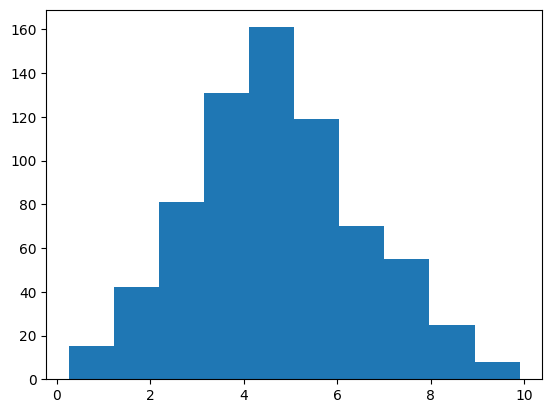

In [7]:
plt.hist(df["tidal_volume"])

In [8]:
df['Gender'] = df.apply(lambda row: 1 if row["Gender"]=="male" else 0, axis=1)
df['Smoke'] = df.apply(lambda row: 1 if row["Smoke"]=="yes" else 0, axis=1)
df['Caesarean'] = df.apply(lambda row: 1 if row["Caesarean"]=="yes" else 0, axis=1)
df.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean,No of children,Weight (kg),tidal_volume
1,10.125,18.0,74.7,1,0,0,0,98.75,5.188990
2,9.550,16.0,69.7,0,0,1,0,11.01,4.894306
3,11.125,14.0,71.0,0,1,0,1,29.78,7.511037
4,4.800,5.0,56.9,0,1,0,4,72.84,3.240717
5,6.225,11.0,58.7,0,0,0,1,24.76,3.190268


In [9]:
# Import necessary function
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop("tidal_volume", axis=1)
y = df["tidal_volume"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# View the shapes of the train/test data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(494, 8) (213, 8) (494,) (213,)


In [10]:
from sklearn.preprocessing import StandardScaler

def scale_data(train_data, test_data):
    scaler = StandardScaler()
    scaler.fit(train_data)
    train_data_scaled = scaler.transform(train_data)
    test_data_scaled = scaler.transform(test_data)

    return train_data_scaled, test_data_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [11]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr = LinearRegression()

# Fit the model
lr.fit(X_train_scaled, y_train)

LinearRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LinearRegression LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error

# Find the predicted values for the training data
y_train_pred = lr.predict(X_train_scaled)

# Find the mean squared error
mse = mean_squared_error(y_train, y_train_pred)

print('Mean Squared Error for the training data: ', mse)

Mean Squared Error for the training data:  0.04467223958468404


In [13]:
# Find the predicted values for testing data
y_test_pred = lr.predict(X_test_scaled)

# Find the mean squared error
mse_test = mean_squared_error(y_test, y_test_pred)

print('Mean Squared Error for the testing data: ', mse_test)

Mean Squared Error for the testing data:  0.04772689625683986


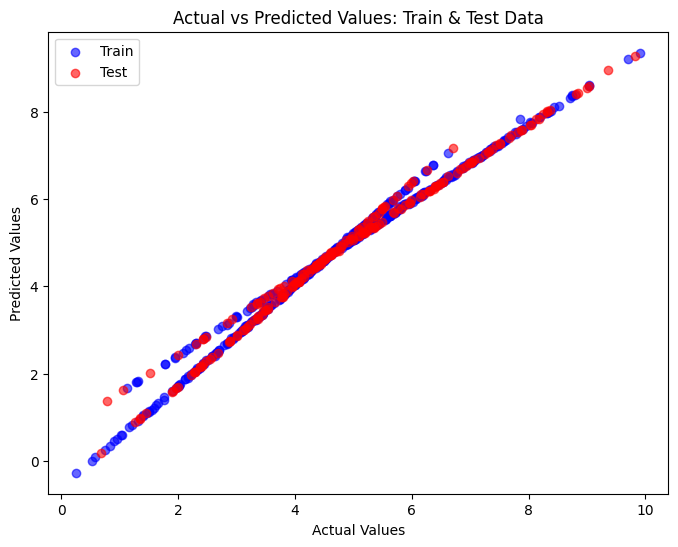

In [14]:
# Import matplotlib's pyplot library
from matplotlib import pyplot as plt

# Plot the predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label='Train')
plt.scatter(y_test, y_test_pred, color='red', alpha=0.6, label='Test')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')
plt.title('Actual vs Predicted Values: Train & Test Data')
plt.show()